<h1>K-Nearest Neighbour (KNN) Classifier<h1>
   

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from math import sqrt
%matplotlib inline

plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 8,6
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
# First, let's load the CSV files to inspect the data and understand their structure.

import pandas as pd

# Load the datasets
train_df = pd.read_csv('Dataset-2/train.csv')
test_df = pd.read_csv('Dataset-2/test.csv')
val_df = pd.read_csv('Dataset-2/val.csv')

# Displaying the first few rows of each dataset to understand the structure
train_df.head(), test_df.head(), val_df.head()


(         x1        x2  label
 0 -0.847404  0.038162      1
 1  1.034957  0.168395      0
 2  0.819651  0.418031      0
 3  0.961126  0.240729      0
 4 -0.845336 -0.214165      1,
          x1        x2  label
 0  0.673030 -0.554547      1
 1  0.814414  0.530984      0
 2  0.591912 -0.542522      1
 3  0.614569 -0.786747      0
 4  0.982891  0.166926      0,
          x1        x2  label
 0 -0.643433  0.358512      1
 1  0.824524 -0.580494      0
 2 -0.084413  0.802602      1
 3 -0.962724 -0.170913      0
 4  0.811932  0.054880      1)

In [3]:
# Load the data (assuming train_df, test_df, val_df have been loaded)
x_train = train_df[['x1', 'x2']].values
y_train = train_df['label'].values
x_test = test_df[['x1', 'x2']].values
y_test = test_df['label'].values
x_val = val_df[['x1', 'x2']].values
y_val = val_df['label'].values

In [4]:
from math import sqrt
# Function to compute Euclidean distance
def euclidean(a, b):
    return sqrt(np.sum((np.array(a) - np.array(b)) ** 2))

# KNN function to classify test point
def knn(x, y, test, k):
    distances = []
    for i in range(len(x)):
        d = euclidean(x[i], test)
        distances.append((d, y[i]))

    distances.sort(key=lambda x: x[0])  # Sort by distance
    count = Counter()

    for i in distances[:k]:
        count[i[1]] += 1

    # Handle tie-breaking
    max_count = count.most_common(1)[0][1]
    tied_classes = [key for key, value in count.items() if value == max_count]

    pred = tied_classes[0]

    # Handle tie by using average distance
    if len(tied_classes) > 1:
        class_avg_dist = {}
        for cls in tied_classes:
            cls_distances = [d[0] for d in distances[:k] if d[1] == cls]
            class_avg_dist[cls] = np.mean(cls_distances)
        pred = min(class_avg_dist, key=class_avg_dist.get)
    else:
        pred = tied_classes[0]

    return pred

# Function to predict using KNN for a dataset
def knn_predict(x_train, y_train, x_test, k):
    predictions = []
    for test_point in x_test:
        pred = knn(x_train, y_train, test_point, k)
        predictions.append(pred)
    return predictions

# Function to evaluate the accuracy of predictions
def evaluate_accuracy(y_true, y_pred):
    correct = np.sum(np.array(y_true) == np.array(y_pred))
    return correct / len(y_true)





In [5]:
# Function to plot confusion matrix with customized font sizes
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))

    # Set title and labels with specific font sizes
    plt.title(title, fontsize=12)
    plt.xlabel('Predicted Label', fontsize=10)
    plt.ylabel('True Label', fontsize=10)

    # Optionally adjust tick label sizes
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()


In [6]:
#Hyperparameter

# Choose k values
k_values = [1, 5, 9]

In [7]:
# Lists to store accuracies for different k values
Accuracyknn_train = []
Accuracyknn_val = []
Accuracyknn_test = []

# Evaluate KNN for each k value
for k in k_values:
    # Predict on training data
    train_predictions = knn_predict(x_train, y_train, x_train, k)
    train_accuracy = evaluate_accuracy(y_train, train_predictions)
    Accuracyknn_train.append(train_accuracy)

    # Predict on validation (CV) data
    val_predictions = knn_predict(x_train, y_train, x_val, k)
    val_accuracy = evaluate_accuracy(y_val, val_predictions)
    Accuracyknn_val.append(val_accuracy)

    # Predict on test data
    test_predictions = knn_predict(x_train, y_train, x_test, k)
    test_accuracy = evaluate_accuracy(y_test, test_predictions)
    Accuracyknn_test.append(test_accuracy)

# Create a DataFrame to store the accuracies for different k values
accuracy_table_KNN = pd.DataFrame(
    {
        "k-value": k_values,
        "Accuracy train": Accuracyknn_train,
        "Accuracy Val": Accuracyknn_val,
        "Accuracy test": Accuracyknn_test,
    }
)

print(accuracy_table_KNN)


   k-value  Accuracy train  Accuracy Val  Accuracy test
0        1        1.000000      1.000000            1.0
1        5        1.000000      0.981132            1.0
2        9        0.994652      0.993711            1.0



Results for K=1:
Test Accuracy for K=1: 1.0
Validation Accuracy for K=1: 1.0
Train Accuracy for K=1: 1.0


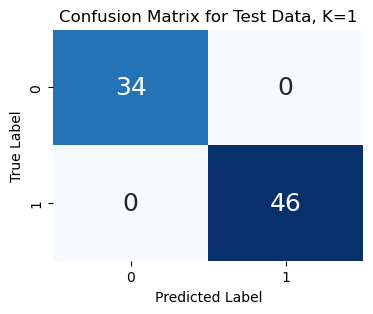

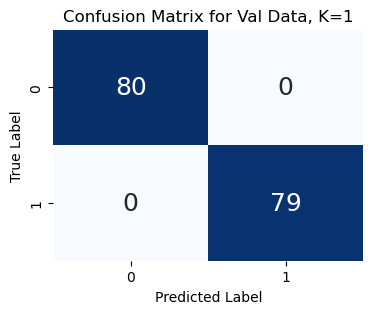

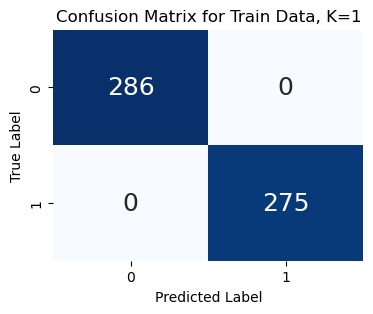


Results for K=5:
Test Accuracy for K=5: 1.0
Validation Accuracy for K=5: 0.9811320754716981
Train Accuracy for K=5: 1.0


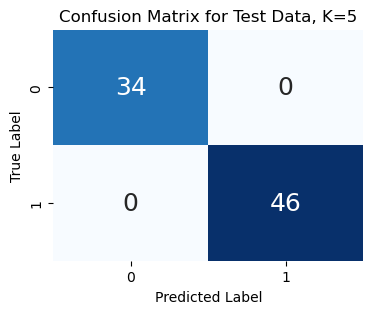

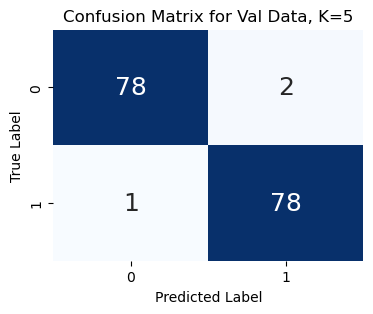

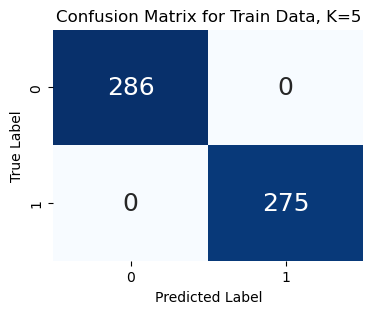


Results for K=9:
Test Accuracy for K=9: 1.0
Validation Accuracy for K=9: 0.9937106918238994
Train Accuracy for K=9: 0.9946524064171123


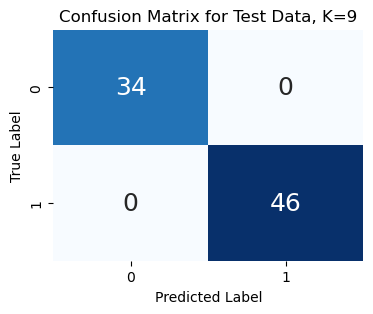

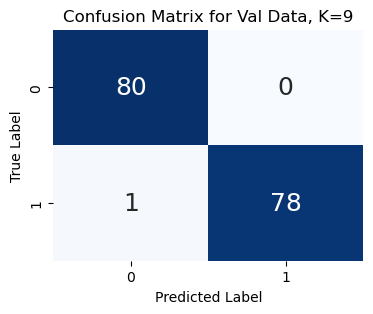

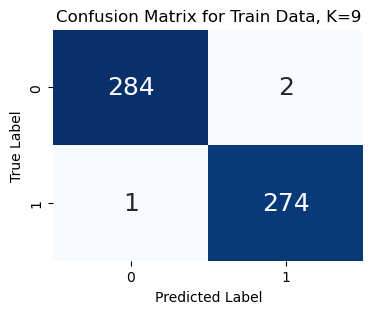

In [8]:
# Run KNN for each k value on test and validation data
for k in k_values:
    print(f"\nResults for K={k}:")

    # Predict on test data
    test_predictions = knn_predict(x_train, y_train, x_test, k)
    test_accuracy = evaluate_accuracy(y_test, test_predictions)
    print(f"Test Accuracy for K={k}: {test_accuracy}")

    # Predict on validation data
    val_predictions = knn_predict(x_train, y_train, x_val, k)
    val_accuracy = evaluate_accuracy(y_val, val_predictions)
    print(f"Validation Accuracy for K={k}: {val_accuracy}")

    # Predict on validation data
    train_predictions = knn_predict(x_train, y_train, x_train, k)
    train_accuracy = evaluate_accuracy(y_train, train_predictions)
    print(f"Train Accuracy for K={k}: {train_accuracy}")
    # Example of how to use the function
    plot_confusion_matrix(y_test, test_predictions, title=f"Confusion Matrix for Test Data, K={k}")
    plot_confusion_matrix(y_val, val_predictions, title=f"Confusion Matrix for Val Data, K={k}")
    plot_confusion_matrix(y_train, train_predictions, title=f"Confusion Matrix for Train Data, K={k}")


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(x_train, y_train, k, h=0.1):
    # Dynamically generate distinct colors for as many classes as needed
    unique_classes = np.unique(y_train)
    n_classes = len(unique_classes)

    # Generate color maps based on the number of classes
    # cmap_light = ListedColormap(plt.cm.get_cmap('Pastel1', n_classes).colors)
    # cmap_bold = ListedColormap(plt.cm.get_cmap('Set1', n_classes).colors)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Define the min and max for the grid based on training data
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

    # Generate a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Flatten the grid to pass into the prediction function
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Use the KNN function to predict the class for each grid point
    Z = knn_predict(x_train, y_train, grid_points, k)

    # Reshape the result back into the grid shape
    Z = np.array(Z).reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50)

    # Add dynamic class labels to the legend
    legend1 = plt.legend(handles=scatter.legend_elements()[0],
                         labels=[f"Y{i} = {label}" for i, label in enumerate(unique_classes)],
                         loc='lower left', title='Classes', fontsize='10', title_fontsize='12')
    plt.gca().add_artist(legend1)

    # Add labels, title, and limits
    plt.title(f"Decision Boundary for K={k}")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


Plotting decision boundary for K=1:


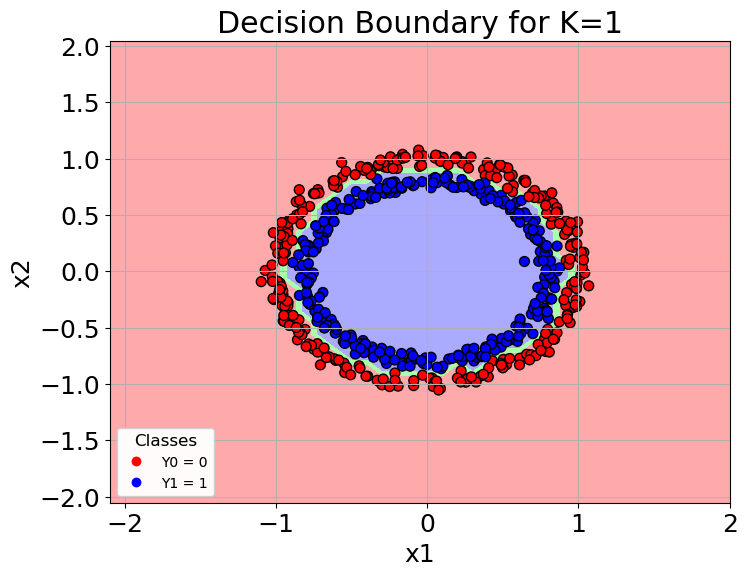

Plotting decision boundary for K=5:


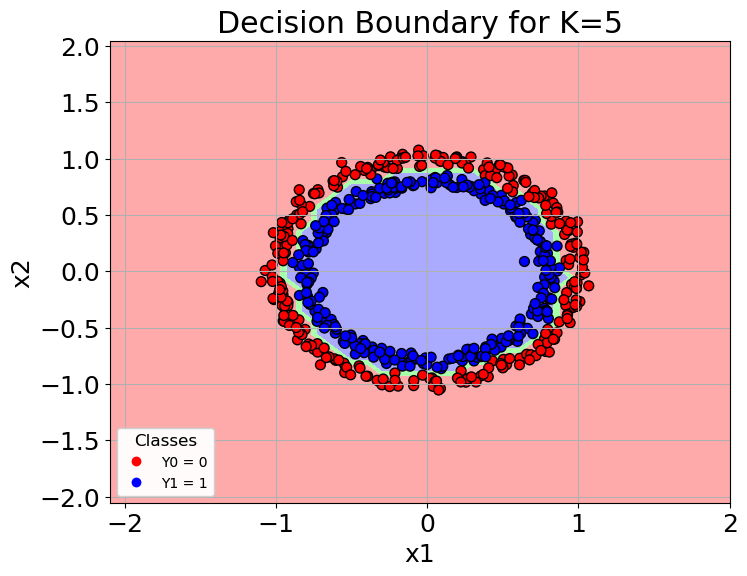

Plotting decision boundary for K=9:


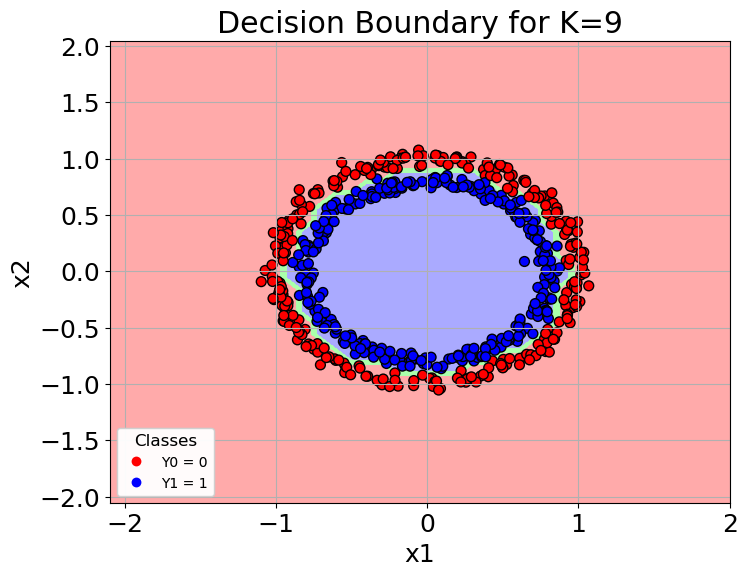

In [10]:
# Plot decision boundaries for each k value
for k in k_values:
    print(f"Plotting decision boundary for K={k}:")
    plot_decision_boundary(x_train, y_train, k)
